# Outline
## 缺失值处理以及数据筛选
## 可视化

In [1]:
import pandas as pd
import time
import random
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import jieba
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
#绘图用
from geopy.geocoders import Nominatim
import folium
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [2]:
df=pd.read_csv('downjacket.csv')
df.head()

,name,price,sales,shop_name,shop_link,product_link,image_link,shipping_insurance,free_shipping,province,city
0,雅鹿正品男士加厚羽绒服中长款2023冬季新款中年冬装保暖外套,399,29人付款,恒源祥皮衣工厂直营店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/58023241/O1...,True,True,上海,NaN
1,MOOSE KNUCKLES 3Q JKT 大毛领保暖运动羽绒服夹克男,11800,2人付款,MOOSE KNUCKLES官方旗舰店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i2/219310104/O...,False,True,上海,NaN
2,2023冬季欧货拼接羽绒服男简约纯色蒙家潮牌帅气时尚轻奢个性外套,299,0人付款,潮流前线D6,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/5291233760/...,False,True,北京,NaN
3,中长款连帽男士羽绒服冬季2023新款潮牌加厚90白鸭绒男生冬装外套,249,99人付款,VUUG旗舰店,https://store.taobao.com/shop/view_shop.htm?ap...,https://detail.tmall.com/item.htm?id=741999329...,https://g-search2.alicdn.com/img/bao/uploaded/...,False,True,福建,泉州
4,羽绒服男士冬季2023新款美式潮牌立领工装白鸭绒情侣加厚保暖外套,209,93人付款,antin soul studios旗舰店,https://store.taobao.com/shop/view_shop.htm?ap...,https://detail.tmall.com/item.htm?id=745909583...,https://g-search1.alicdn.com/img/bao/uploaded/...,False,True,福建,泉州


## 缺失值处理

In [3]:
# 缺失值查看
print(df.isnull().sum())  
df[df['sales'].isna()].head()

name                    0
price                   0
sales                  99
shop_name               0
shop_link               0
product_link            0
image_link              0
shipping_insurance      0
free_shipping           0
province                0
city                  378
dtype: int64


,name,price,sales,shop_name,shop_link,product_link,image_link,shipping_insurance,free_shipping,province,city
97,[经典款]THOM BROWNE 男士秋冬四条纹连帽内置背带外套,21950,NaN,THOMBROWNE官方旗舰店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/2056790019/...,False,True,浙江,嘉兴
290,24期免息ZEGNA杰尼亚男装Cashco Elements户外束腰夹克/,44900,NaN,ZEGNA杰尼亚官方旗舰店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/274830191/O...,False,True,上海,NaN
344,爸爸冬季羽绒服中年男士冬装外套50岁父亲冬季上衣中老年人衣厚,218,NaN,惠绅服饰旗舰店,https://store.taobao.com/shop/view_shop.htm?ap...,https://detail.tmall.com/item.htm?id=740297687...,https://g-search1.alicdn.com/img/bao/uploaded/...,True,True,江苏,NaN
384,[经典款]THOM BROWNE 男士秋冬四条纹连帽内置背带外套,21950,NaN,THOMBROWNE官方旗舰店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/2056790019/...,False,True,浙江,嘉兴
467,羽绒服男冬宽松加厚保暖大码冬装百搭潮牌港风国潮学生连帽面包,130,NaN,Sio国潮原创,https://store.taobao.com/shop/view_shop.htm?ap...,https://item.taobao.com/item.htm?id=6874873244...,https://g-search2.alicdn.com/img/bao/uploaded/...,True,True,浙江,NaN


In [4]:
#处理sales缺失值
# 删除 'sales' 列中包含缺失值的行
df = df.dropna(subset=['sales'])

#删除0人购买的行
df=df[df['sales']!='0人付款']


In [5]:
# 处理城市缺失值
# 定义直辖市列表
direct_cities = ['天津', '重庆', '北京', '上海']

# 使用 .loc 和条件语句来更新 'city' 列
df.loc[df['province'].isin(direct_cities), 'city'] = df['province']

print(df.isnull().sum())  

name                  0
price                 0
sales                 0
shop_name             0
shop_link             0
product_link          0
image_link            0
shipping_insurance    0
free_shipping         0
province              0
city                  1
dtype: int64


In [6]:
df[df['city'].isna()]
df=df[df['province']!='韩国']
print(df.isnull().sum()) 
df.head()

name                  0
price                 0
sales                 0
shop_name             0
shop_link             0
product_link          0
image_link            0
shipping_insurance    0
free_shipping         0
province              0
city                  0
dtype: int64


,name,price,sales,shop_name,shop_link,product_link,image_link,shipping_insurance,free_shipping,province,city
0,雅鹿正品男士加厚羽绒服中长款2023冬季新款中年冬装保暖外套,399,29人付款,恒源祥皮衣工厂直营店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i4/58023241/O1...,True,True,上海,上海
1,MOOSE KNUCKLES 3Q JKT 大毛领保暖运动羽绒服夹克男,11800,2人付款,MOOSE KNUCKLES官方旗舰店,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://click.simba.taobao.com/cc_im?p=%D3%F0%...,https://img.alicdn.com/imgextra/i2/219310104/O...,False,True,上海,上海
3,中长款连帽男士羽绒服冬季2023新款潮牌加厚90白鸭绒男生冬装外套,249,99人付款,VUUG旗舰店,https://store.taobao.com/shop/view_shop.htm?ap...,https://detail.tmall.com/item.htm?id=741999329...,https://g-search2.alicdn.com/img/bao/uploaded/...,False,True,福建,泉州
4,羽绒服男士冬季2023新款美式潮牌立领工装白鸭绒情侣加厚保暖外套,209,93人付款,antin soul studios旗舰店,https://store.taobao.com/shop/view_shop.htm?ap...,https://detail.tmall.com/item.htm?id=745909583...,https://g-search1.alicdn.com/img/bao/uploaded/...,False,True,福建,泉州
5,森马集团棉致白鸭绒羽绒服男冬季2023新款轻薄加厚短款青少年外套,275,100+人付款,森马旗下棉致臻选店,https://store.taobao.com/shop/view_shop.htm?ap...,https://item.taobao.com/item.htm?id=7435233494...,https://g-search2.alicdn.com/img/bao/uploaded/...,False,True,浙江,杭州


In [7]:
df['sales']=df['sales'].apply(lambda x: x[:-3])

In [8]:
def define_category(sales_value):
    try:
        # Try to convert the sales value to an integer
        int_value = int(sales_value)
        if int_value <= 100:
            return '<100'
        else:
            return sales_value
    except ValueError:
        # If conversion fails, it's not an integer, so keep the original value
        return sales_value


df['sales_category'] = df['sales'].apply(define_category).astype('category')
df['sales_category'].unique()

['<100', '100+', '400+', '300+', '900+', ..., '700+', '1000+', '600+', '800+', '1万+']
Length: 14
Categories (14, object): ['100+', '1000+', '1万+', '200+', ..., '700+', '800+', '900+', '<100']

In [21]:
for i in df['sales_category'].unique():
    print(i)

<100
100+
400+
300+
900+
200+
500+
2000+
3000+
700+
1000+
600+
800+
1万+


In [9]:
def merge_categories(sales):
    if sales == '<100':
        return 'small'
    elif sales in ['100+', '200+', '300+', '400+', '500+']:#, '600+', '700+', '800+', '900+',
        return 'mid'
    else:
        return 'high'


# 应用合并规则
df['merged_sales_category'] = df['sales_category'].apply(merge_categories)



In [19]:
#存储
df.to_csv('cleanedData.csv')

## 可视化

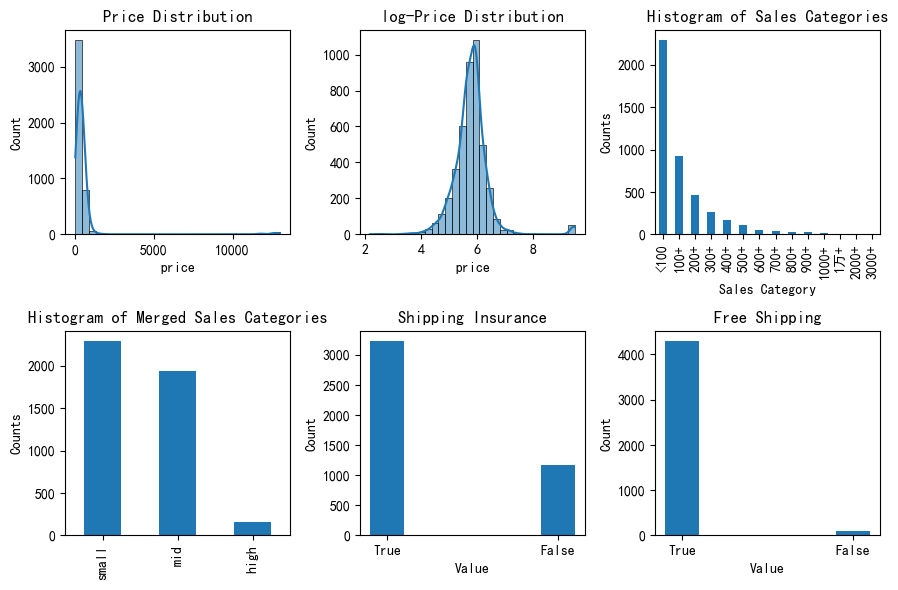

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 4. 统计绘图
plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')


plt.subplot(2, 3, 2)
sns.histplot(np.log(df['price']), bins=30, kde=True)
plt.title('log-Price Distribution')


plt.subplot(2, 3, 3)
df['sales_category'].value_counts().plot(kind='bar')
plt.xlabel('Sales Category')
plt.ylabel('Counts')
plt.title('Histogram of Sales Categories')


# 继续之后的数据处理和可视化
# 按照类名对数据进行排序
sorted_data2 = df['merged_sales_category'].value_counts().sort_index()
plt.subplot(2, 3, 4)
# 绘制排序后的直方图

df['merged_sales_category'].value_counts().plot(kind='bar')
#plt.xlabel('Merged Sales Category')
plt.ylabel('Counts')
plt.title('Histogram of Merged Sales Categories')

insurance_counts = df['shipping_insurance'].value_counts()
free_shipping_counts = df['free_shipping'].value_counts()
plt.subplot(2, 3, 5)  # 1行2列的第1个
plt.bar(insurance_counts.index.map(str), insurance_counts.values, width=0.2)
plt.title('Shipping Insurance')
plt.xlabel('Value')
plt.ylabel('Count')

# 绘制 free_shipping 分布
plt.subplot(2, 3, 6)  # 1行2列的第2个
plt.bar(free_shipping_counts.index.map(str), free_shipping_counts.values, width=0.2)
plt.title('Free Shipping')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

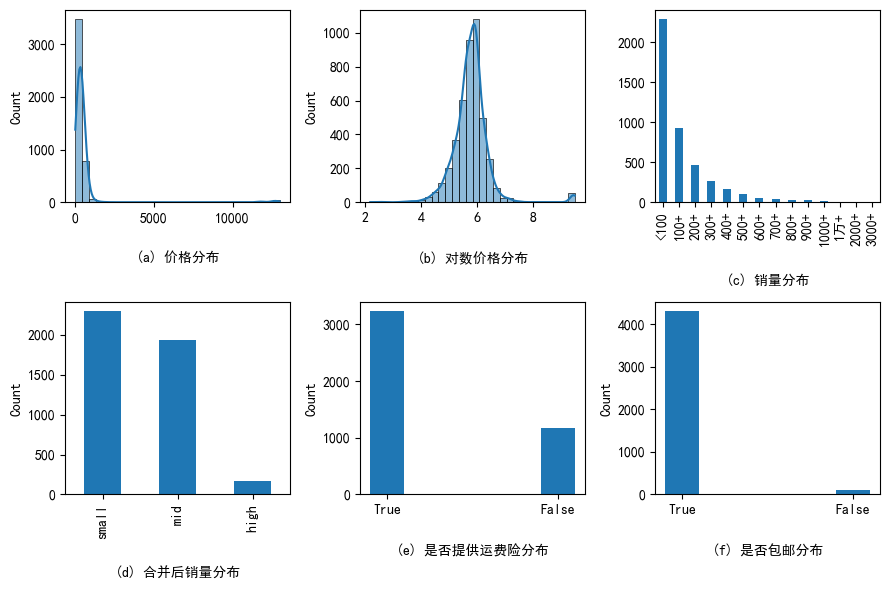

In [12]:
plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('(a) 价格分布', labelpad=20)

plt.subplot(2, 3, 2)
sns.histplot(np.log(df['price']), bins=30, kde=True)
plt.xlabel('(b) 对数价格分布', labelpad=20)

plt.subplot(2, 3, 3)
df['sales_category'].value_counts().plot(kind='bar')
plt.xlabel('(c) 销量分布', labelpad=20)

plt.subplot(2, 3, 4)
df['merged_sales_category'].value_counts().plot(kind='bar')
plt.xlabel('(d) 合并后销量分布', labelpad=20)
plt.ylabel('Count')

insurance_counts = df['shipping_insurance'].value_counts()
free_shipping_counts = df['free_shipping'].value_counts()

plt.subplot(2, 3, 5)
plt.bar(insurance_counts.index.map(str), insurance_counts.values,width=0.2)
plt.xlabel('(e) 是否提供运费险分布', labelpad=20)
plt.ylabel('Count')

plt.subplot(2, 3, 6)
plt.bar(free_shipping_counts.index.map(str), free_shipping_counts.values,width=0.2)
plt.xlabel('(f) 是否包邮分布', labelpad=20)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

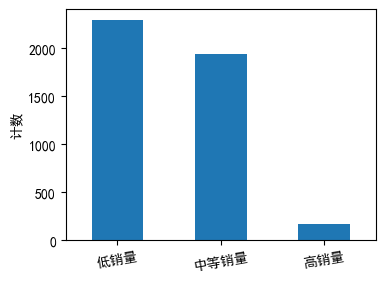

In [11]:
plt.figure(figsize=(4,3))


df['merged_sales_category'].value_counts().plot(kind='bar', width=0.5)
plt.ylabel('计数')

# 设置第二个图的x轴标签
categories = ['低销量', '中等销量', '高销量']  # 假设有三个新标签
plt.xticks(range(len(categories)), categories,rotation=10)  # 通过range生成标签的位置列表

# 设置子图之间的间距
plt.subplots_adjust(wspace=0.4)
plt.savefig('bar_chart.svg', format='svg')
plt.show()


In [17]:
#城市可视化

# 计算每个城市出现的次数
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# 获取每个城市的经纬度


def get_lat_lon(city, proxy_url="http://127.0.0.1:7890"):
    url = f'https://nominatim.openstreetmap.org/search?city={city}&format=json&accept-language=zh'

    # 使用代理
    proxies = {
        "http": proxy_url,
        "https": proxy_url,
    }

    result = requests.get(url=url, proxies=proxies)
    if result.status_code == 200:
        result_json = result.json()
        if result_json:
            # 返回第一个搜索结果的经纬度
            return float(result_json[0]['lat']), float(result_json[0]['lon'])
        else:
            return "Location not found"
    else:
        return f"Error: HTTP {result.status_code}"


for city in city_counts['city']:
    city_counts.loc[city_counts['city'] == city, ['latitude', 'longitude']] = get_lat_lon(city)
    #print(city_counts.loc[city_counts['city'] == city, ['latitude', 'longitude']])
    time.sleep(1)  # 每个请求之间暂停1秒


In [12]:
city_counts.to_csv('city_pos.csv')

In [30]:
from matplotlib.colors import LinearSegmentedColormap
city_counts=pd.read_csv('city_pos.csv')
m = folium.Map(location=[35, 100], zoom_start=4)

# 创建一个从橙色到红色的颜色映射
colors = ["orange", "red"]
cmap = LinearSegmentedColormap.from_list("orange_red", colors)

# 创建颜色映射函数
min_count = city_counts['count'].min()
max_count = city_counts['count'].max()

def get_color(count):
    # 将 count 值归一化到 0-1 范围内
    norm_count = (count - min_count) / (max_count - min_count)
    # 从颜色映射中获取相应的颜色，并转换为 HEX 格式
    rgba_color = cmap(norm_count)
    return matplotlib.colors.rgb2hex(rgba_color)

# 遍历每个城市，添加标记
# 循环遍历数据，添加圆标记
for _, row in city_counts.iterrows():
    if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
        radius = min(25, row['count'] *1)  # 例如，最大半径为5
        color = get_color(row['count'])  # 获取颜色
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color
        ).add_to(m)

# 保存或显示地图
m.save('map.html')  # 保存到文件
# 或者直接显示，在Jupyter Notebook中可以直接显示
m

In [13]:
# name可视化
def load_stopwords(path):
    with open(path, 'r', encoding='utf-8') as file:
        stopwords = set([line.strip() for line in file])
    return stopwords

stopwords = load_stopwords("stopword.txt")


# 对comment列进行分词处理
def segment(text, stopwords):
    words = jieba.cut(text)
    return [word for word in words if word not in stopwords]

# 使用分词和去除停用词
df['words'] = df['name'].apply(lambda x: segment(x, stopwords))
#f.to_csv('cleaned_file.csv')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\11385\AppData\Local\Temp\jieba.cache
Loading model cost 0.730 seconds.
Prefix dict has been built successfully.


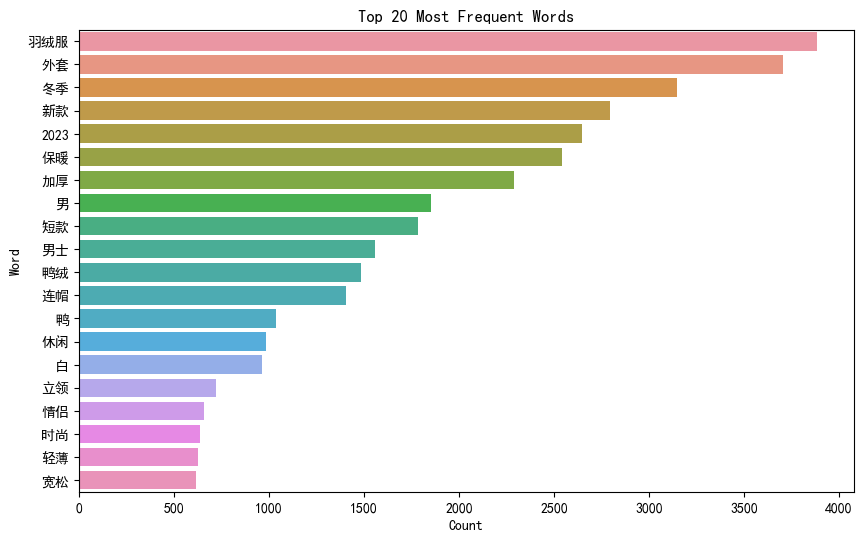

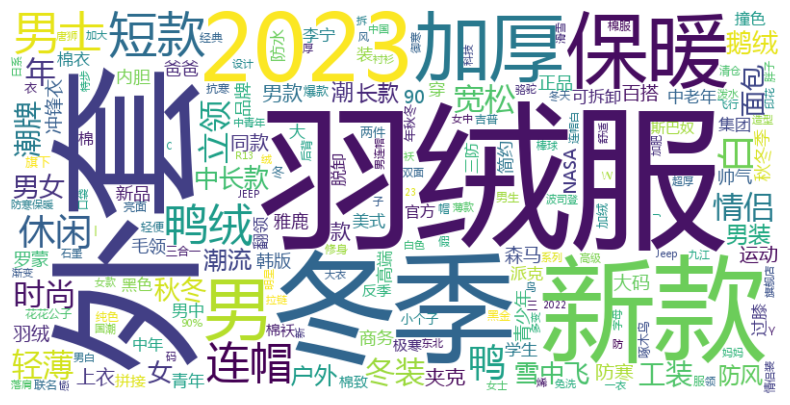

In [18]:
# 合并所有分词结果到一个长列表中
all_words = sum(df['words'], [])

# 统计词频
word_counts = Counter(all_words)

# 转换为DataFrame用于进一步分析
df_word_counts = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)


# 指定中文字体，例如使用"SimHei"
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是一种常见的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
# 取前N个最常见的词
top_n = 20
top_words = df_word_counts.head(top_n)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()
# 生成词云

font_path = '微软雅黑.ttf'  # 替换为您的字体文件路径
wordcloud = WordCloud(
    font_path=font_path,  # 指定字体路径
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(word_counts)
# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


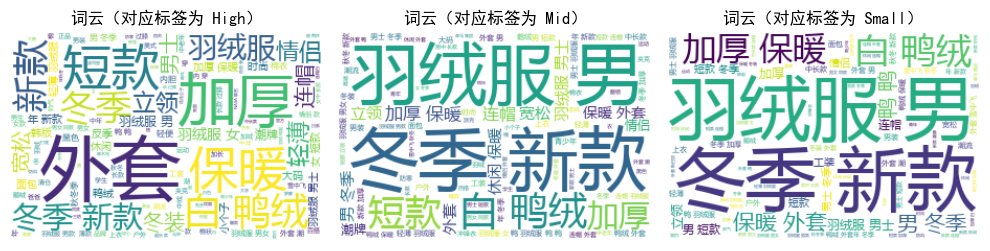

In [14]:
word_freq_by_tag = df.groupby('merged_sales_category')['words'].apply(lambda x: ' '.join(x.sum()))

# 设置词云参数
wordcloud_params = {
    'background_color': 'white',
    'width': 300,
    'height': 200,
    'font_path': '微软雅黑.ttf' 
}

# 为每个标签生成词云
fig, axes = plt.subplots(1, 3, figsize=(10, 6))  # 1行3列的子图

# 遍历每个销售类别，并在子图上生成词云
for ax, (tag, words) in zip(axes, word_freq_by_tag.items()):
    wordcloud = WordCloud(**wordcloud_params).generate(words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'词云（对应标签为 {tag.title()}）')

plt.tight_layout()  # 自动调整子图参数，以确保子图之间没有重叠
plt.show()

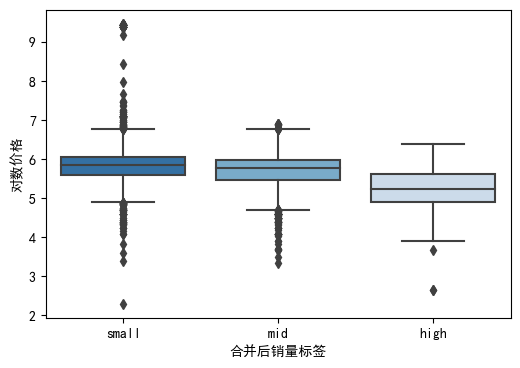

In [17]:
# 取价格的对数，添加一列到df中
df['log_price'] = np.log1p(df['price'])  # 使用log1p以避免对0取对数

# 绘制对数价格的箱型图
plt.figure(figsize=(6,4))
sns.boxplot(x='merged_sales_category', y='log_price', data=df, order=['small', 'mid', 'high'], palette='Blues_r')
#plt.title('Log Price Distribution Across Sales Categories')
plt.ylabel('对数价格')
plt.xlabel('合并后销量标签')
plt.show()

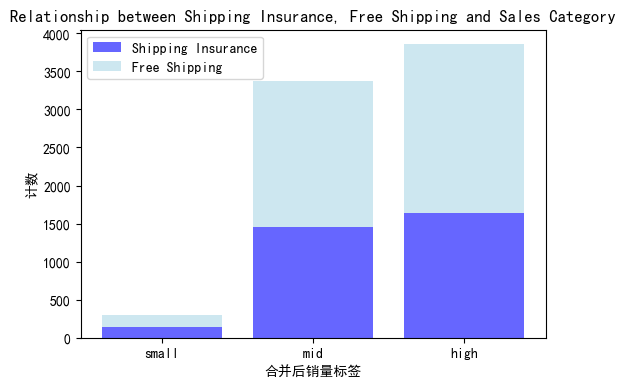

In [23]:
categories = df['merged_sales_category'].unique()
insurance_counts = df.groupby(['merged_sales_category', 'shipping_insurance']).size().unstack(fill_value=0)
free_shipping_counts = df.groupby(['merged_sales_category', 'free_shipping']).size().unstack(fill_value=0)

# 然后，绘制堆叠条形图
fig, ax = plt.subplots(figsize=(6,4))

# 添加第一组条形图（shipping_insurance）
ax.bar(categories, insurance_counts[True], label='Shipping Insurance', color='blue', alpha=0.6)
# 在第一组条形图上堆叠第二组（free_shipping）
ax.bar(categories, free_shipping_counts[True], bottom=insurance_counts[True], label='Free Shipping', color='lightblue', alpha=0.6)

# 添加图例和标题
ax.legend()
ax.set_title('运输保险、免费送货与销量类别的关系')  # 标题修改为中文
ax.set_title('Relationship between Shipping Insurance, Free Shipping and Sales Category')
ax.set_xlabel('合并后销量标签')
ax.set_ylabel('计数')

# 显示图表
plt.show()